# Data Wrangling with pandas

So, in the previous lecture you learned about Numpy. You probably felt it to be sometimes complicated for routine tasks (e.g. get only data from one of the fields of a file, convert individual fields). 

The Pandas module tries to automatize a series of typical tasks that us, Data Scientists, have to do all the time. This doesn't mean that what you learned with Numpy is not useful anymore. In fact, all of that will be precious in many circumstances (e.g. Pandas uses a lot of Numpy features too!).

## Data frames - a powerful data-structure

The pandas module provides a powerful data-structure called a data frame.

It is similar, but not identical to:
* a table in a relational database,
* an Excel spreadsheet,
* a dataframe in R.

Data frames can be read and written to/from:
* database queries, database tables
* CSV files
* json files

Beware that data frames are memory resident!

## Importing pandas

The pandas module is usually imported with the alias pd.

In [1]:
import pandas as pd

## Series - DataFrames

Pandas is object-oriented. We create data frames by constructing instances of different classes. The two most important classes are:

* `DataFrame`
* `Series`

Let's create our first `Series`.

**(Don't forget to play with our code to really understand what's going on!)**

In [2]:
import numpy as np
data = np.random.randn(5)    #create 5 random numbers
data

array([ 1.25075734, -0.32286089, -0.61772232,  0.42915832, -0.36595579])

In [3]:
my_series = pd.Series(data, index=['a', 'b', 'c', 'd', 'e'])
my_series

a    1.250757
b   -0.322861
c   -0.617722
d    0.429158
e   -0.365956
dtype: float64

We can **plot** a `Series` by invoking the `plot()` method on an instance of a `Series` object. The x-axis will automatically be labelled with the series index!

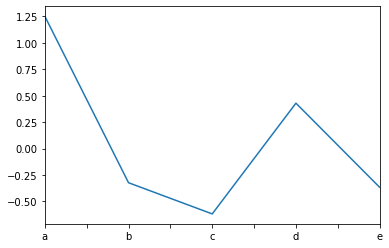

In [4]:
%matplotlib inline
my_series.plot()

We can also create a series with automatic index.

In [5]:
pd.Series(data)

0    1.250757
1   -0.322861
2   -0.617722
3    0.429158
4   -0.365956
dtype: float64

Series can be accessed using the same syntax as arrays and dicts. So, we are going to use the labels in the index to access each element.

In [6]:
my_series['b']

-0.32286088920572314

We can also use the label like an attribute:

In [7]:
my_series.b

-0.32286088920572314

Finally, we can specify a range of labels to obtain a slice:

In [8]:
my_series[['b', 'c']]

b   -0.322861
c   -0.617722
dtype: float64

Now, let's create a **DataFrame** by passing a numpy array, with a datetime index and labeled columns.

First, the datetime index:

In [9]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

Now, we create the DataFrame:

In [10]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.061910,1.039367,-0.949678,-0.488559
2013-01-02,1.726642,2.136989,0.462421,0.107720
2013-01-03,-0.187608,-1.250711,1.315189,-0.083178
2013-01-04,-1.135865,1.141076,0.315414,1.166233
2013-01-05,0.316038,0.910104,0.845529,-0.435534
2013-01-06,-0.126687,0.272632,2.476551,-0.795103


and a second `DataFrame` by passing a dict of objects that can be converted to series-like.

In [11]:
df2 = pd.DataFrame({ 'A' : [1., 2.1, 3.5, 8.1],
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32')})
print(df2) 

     A          B    C
0  1.0 2013-01-02  1.0
1  2.1 2013-01-02  1.0
2  3.5 2013-01-02  1.0
3  8.1 2013-01-02  1.0


In [12]:
print(df2.dtypes)

A           float64
B    datetime64[ns]
C           float32
dtype: object


## Viewing Data

You can see the top & bottom rows of the frame:

In [13]:
# 5 top rows
df.head()

,A,B,C,D
2013-01-01,-0.061910,1.039367,-0.949678,-0.488559
2013-01-02,1.726642,2.136989,0.462421,0.107720
2013-01-03,-0.187608,-1.250711,1.315189,-0.083178
2013-01-04,-1.135865,1.141076,0.315414,1.166233
2013-01-05,0.316038,0.910104,0.845529,-0.435534


In [14]:
# 3 last rows
df.tail(3)

,A,B,C,D
2013-01-04,-1.135865,1.141076,0.315414,1.166233
2013-01-05,0.316038,0.910104,0.845529,-0.435534
2013-01-06,-0.126687,0.272632,2.476551,-0.795103


Let's display the **index, columns, and the underlying numpy data**:

In [15]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[-0.06190989,  1.03936695, -0.94967826, -0.48855925],
       [ 1.72664198,  2.13698932,  0.46242063,  0.10772045],
       [-0.18760783, -1.25071107,  1.31518901, -0.08317807],
       [-1.13586498,  1.14107623,  0.31541394,  1.16623342],
       [ 0.31603806,  0.91010375,  0.84552903, -0.43553409],
       [-0.12668676,  0.27263201,  2.47655082, -0.79510268]])

If you are interested in seeing quick statistic summary of your data then:

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.088435,0.708243,0.744238,-0.088070
std,0.935897,1.131928,1.137525,0.691759
min,-1.135865,-1.250711,-0.949678,-0.795103
25%,-0.172378,0.432000,0.352166,-0.475303
50%,-0.094298,0.974735,0.653975,-0.259356
75%,0.221551,1.115649,1.197774,0.059996
max,1.726642,2.136989,2.476551,1.166233


and if you want to sort your data by a certain column:

In [19]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,-0.187608,-1.250711,1.315189,-0.083178
2013-01-06,-0.126687,0.272632,2.476551,-0.795103
2013-01-05,0.316038,0.910104,0.845529,-0.435534
2013-01-01,-0.061910,1.039367,-0.949678,-0.488559
2013-01-04,-1.135865,1.141076,0.315414,1.166233
2013-01-02,1.726642,2.136989,0.462421,0.107720


## Selecting data

If you want to select a specific column to print:

In [20]:
print(df['A'])

2013-01-01   -0.061910
2013-01-02    1.726642
2013-01-03   -0.187608
2013-01-04   -1.135865
2013-01-05    0.316038
2013-01-06   -0.126687
Freq: D, Name: A, dtype: float64


Rows can be selected using either the index:

In [21]:
print(df['20130102':'20130104'])

                   A         B         C         D
2013-01-02  1.726642  2.136989  0.462421  0.107720
2013-01-03 -0.187608 -1.250711  1.315189 -0.083178
2013-01-04 -1.135865  1.141076  0.315414  1.166233


or simpler using the numeric index of the rows you want to print:

In [22]:
print(df[1:4])

                   A         B         C         D
2013-01-02  1.726642  2.136989  0.462421  0.107720
2013-01-03 -0.187608 -1.250711  1.315189 -0.083178
2013-01-04 -1.135865  1.141076  0.315414  1.166233


For getting a cross section using a label:

In [23]:
df.loc[dates[0]]

A   -0.061910
B    1.039367
C   -0.949678
D   -0.488559
Name: 2013-01-01 00:00:00, dtype: float64

If you want to be even more specific and show only the first two columns of the first three rows:

In [24]:
df.loc['20130101':'20130103',['A','B']]

,A,B
2013-01-01,-0.061910,1.039367
2013-01-02,1.726642,2.136989
2013-01-03,-0.187608,-1.250711


Sometimes we do not care about the actual value of the index, but only its relevant position. Therefore, if we want to print the values of the fourth date-row:

In [25]:
print(df.iloc[3])

A   -1.135865
B    1.141076
C    0.315414
D    1.166233
Name: 2013-01-04 00:00:00, dtype: float64


By integer slices, acting similar to numpy/python:

In [26]:
print(df.iloc[3:5,0:2])

                   A         B
2013-01-04 -1.135865  1.141076
2013-01-05  0.316038  0.910104


Another interesting tool is **the boolean indexing**. We can isolate the rows that meet a specific criterion that we want, such as:

In [27]:
print(df[df.A > 0])

                   A         B         C         D
2013-01-02  1.726642  2.136989  0.462421  0.107720
2013-01-05  0.316038  0.910104  0.845529 -0.435534


For filtering, the following command helps:

In [28]:
#First, let's create a copy of our dataframe
df2 = df.copy()

# Now, we will add a new column, named "E" with the following values:
df2['E'] = ['one', 'one','two','three','four','three']

#So, now if we want to show the rows that have the value "two" or "four" at the column "E", we will type: 
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.187608,-1.250711,1.315189,-0.083178,two
2013-01-05,0.316038,0.910104,0.845529,-0.435534,four


## Operations 

One of the essential pieces of NumPy is the ability to perform quick elementwise operations, both with basic arithmetic (addition, subtraction, multiplication, etc.) and with more sophisticated operations (trigonometric functions, exponential and logarithmic functions, etc.). Pandas inherits much of this functionality from NumPy, and the universal functions are key to this.

Pandas includes a couple useful twists, however: for unary operations like negation and trigonometric functions, these universal functions will preserve index and column labels in the output, and for binary operations such as addition and multiplication, Pandas will automatically align indices when passing the objects to the universal function. This means that keeping the context of data, and combining data from different sources – both potentially error-prone tasks with raw NumPy arrays – become essentially foolproof with Pandas. We will additionally see that there are well-defined operations between one-dimensional `Series` structures and two-dimensional `DataFrame` structures.

Because Pandas is designed to work with NumPy, any NumPy  universal function will work on pandas Series and DataFrame objects. Lets start by defining a simple Series and DataFrame on which to demonstrate this:

In [29]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [30]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


If we apply a NumPy universal function on either of these objects, the result will be another Pandas object with the indices preserved:

In [31]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Or, for a slightly more complex calculation:

In [32]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


For binary operations on two `Series` or `DataFrame` objects, Pandas will align indices in the process of performing the operation. This is very convenient when working with **incomplete data**, as we’ll see in some of the examples below.

As an example, suppose we are combinging two different data sources, and find only the top three US states by area and the top three US states by population:

In [33]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,'New York': 19651127}, name='population')

Let’s see what happens when we divide these to compute the population density:

In [34]:
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

The resulting array contains the **union** of indices of the two input arrays, which could be determined using standard Python set arithmetic on these indices:

In [35]:
area.index | population.index

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

Any item for which one or the other does not have an entry is marked by NaN, or “Not a Number”, which is how Pandas marks missing data. This index matching is implemented this way for any of Pythons built-in arithmetic expressions; any missing values are filled-in with NaN by default:

In [36]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

If filling-in NaN values is not the desired behavior, the fill value can be modified using appropriate object methods in place of the operators. For example, calling `A.add(B)` is equivalent to calling A + B, but allows optional explicit specification of the fill value:

In [37]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

A similar type of alingment takes place for both columns and indices when performing operations on dataframes:

In [38]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [39]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [40]:
A+B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Notice that indices are aligned correctly irrespective of their order in the two objects, and indices in the result are sorted. Similarly to the case of the Series, we can use the associated object’s arithmetic method and pass any desired fill_value to be used in place of missing entries:

In [41]:
A.add(B, fill_value=np.mean(A.values))

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


### Merge, Join, Append

Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [42]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.183035,-0.321991,-1.730930,-1.377328
1,-0.745870,-0.148537,0.806748,1.446689
2,3.060517,-1.274901,-0.520884,1.946050
3,0.050230,0.617999,0.385590,1.642274
4,0.254851,-0.368576,0.378944,-0.346836
5,0.275115,-1.223011,0.049230,0.021925
6,-0.011121,-0.961610,-2.190214,-1.405122
7,0.338970,-2.776705,0.632350,1.033013
8,-0.184876,-1.027667,-0.296452,-0.799594
9,0.626581,-1.368118,0.264330,0.040450


In [43]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,0.183035,-0.321991,-1.730930,-1.377328
1,-0.745870,-0.148537,0.806748,1.446689
2,3.060517,-1.274901,-0.520884,1.946050


**`pandas.concat`** command concatenates pandas objects along a particular axis with optional set logic along the other axes.

In [44]:
pd.concat(pieces)

,0,1,2,3
0,0.183035,-0.321991,-1.730930,-1.377328
1,-0.745870,-0.148537,0.806748,1.446689
2,3.060517,-1.274901,-0.520884,1.946050
3,0.050230,0.617999,0.385590,1.642274
4,0.254851,-0.368576,0.378944,-0.346836
5,0.275115,-1.223011,0.049230,0.021925
6,-0.011121,-0.961610,-2.190214,-1.405122
7,0.338970,-2.776705,0.632350,1.033013
8,-0.184876,-1.027667,-0.296452,-0.799594
9,0.626581,-1.368118,0.264330,0.040450


**`DataFrame.merge`** command merges DataFrame objects by performing a database-style join operation by columns or indexes.

In [45]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**`DataFrame.join`** command joins columns with other DataFrame either on index or on a key column. Efficiently Join multiple DataFrame objects by index at once by passing a list.

In [46]:
left.join(right, lsuffix='_caller', rsuffix='_other')

,key_caller,lval,key_other,rval
0,foo,1,foo,4
1,foo,2,foo,5


**`DataFrame.append`** command appends rows of other to the end of this frame, returning a new object. Columns not in this frame are added as new columns.

In [47]:
df.append(pieces[0], ignore_index=True)

,0,1,2,3
0,0.183035,-0.321991,-1.730930,-1.377328
1,-0.745870,-0.148537,0.806748,1.446689
2,3.060517,-1.274901,-0.520884,1.946050
3,0.050230,0.617999,0.385590,1.642274
4,0.254851,-0.368576,0.378944,-0.346836
5,0.275115,-1.223011,0.049230,0.021925
6,-0.011121,-0.961610,-2.190214,-1.405122
7,0.338970,-2.776705,0.632350,1.033013
8,-0.184876,-1.027667,-0.296452,-0.799594
9,0.626581,-1.368118,0.264330,0.040450


### Grouping in Pandas

Most of the time, you have a set of data that lends itself to being categorized or grouped. As a general example, let's say we have data on a wide variety of people. We may perform an analysis where we compare groups in the data based on age, gender, birth month, shoe size, or birth city; the options are as numerous as the data points!

I think it would be intriguing to work now with a proper dataset from Citi Bike - Daily Ridership and Membership Data

In [49]:
df = pd.read_csv('201707-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


It looks like there is a good opportunity to break the data down into groups to look for some interesting trends. Some ideas are:

* Group on the gender column and see if there are more male or female riders.
* Do specific stations get used more than others? We can group on the station start or finish id.
* Group the data on the day of the week, to see if there is more utilization for a particular day, on average.

### How about a few examples?

If we want to group by just the gender, then we pass this key (column name) to the groupby function as the sole argument. This example is the simplest form of grouping.

In [51]:
groupedGender = df.groupby('gender')
print(groupedGender)

The output shows that groupby returns a pandas `DataFrameGroupBy` object. Pandas has just made some internal calculations about the new gender groups and is ready to apply some operation on each of these groups.

Getting back to the data, if we use the `count` method, we can see the total number of entries **for each gender group**. For reference, here's what the website (from where the dataset was downloaded) says for the gender codes - "Gender (Zero=unknown; 1=male; 2=female)"

In [52]:
groupedGender.size()

gender
0     235194
1    1099384
2     401021
dtype: int64

In [53]:
# look at the size as a percentage of the whole (using the trip)
total = df.gender.count()
groupedGender.size() / total * 100

gender
0    13.551172
1    63.343203
2    23.105625
dtype: float64

It looks like males make up the majority of Citi Bike riders (~63%)!

We can use a single column from the `DataFrameGroupBy` object and apply some aggregation function on it - how about the **mean** and **standard deviation** of the trip durations for all three groups?

In [54]:
groupedGender['tripduration'].mean() / 60.

gender
0    31.229350
1    15.028095
2    16.956202
Name: tripduration, dtype: float64

In [55]:
# Don't have to use the bracket notation
groupedGender.tripduration.std() / 60.

gender
0    223.804023
1    147.871659
2    147.872049
Name: tripduration, dtype: float64

Although males make up the majority of Citi Bike riders, there's not much of a difference in their trip durations. Interestingly, gender unknown riders take 2x as long of rides on average. These riders are likely single-use customers (when you purchase a one time pass at a Citi Bike kiosk you are not asked for your gender).

So there are some summary statistics for these groups (as an aside, you can use the describe function to get these statistics and more in one call). That's a whole lot of spread around the mean, which probably means there are some outliers in the data (maybe people that kept the bike for days). Just a brief look at this even though it's outside the scope, because I'm sure you were all interested 😊

In [56]:
df[df.tripduration > 10000].tripduration.count()
5110

5110

Our suspicions are confirmed - there are many bike rentals outside 2:45 even though the "max" is supposed to be 30 minutes (or 45 if you're a Citi Bike member).

In [61]:
# %pip install ggplot
from ggplot import *

df_short = df[df.tripduration < 10000]
df_short.tripduration = df_short.tripduration / 60.
ggplot(df_short, aes(x='tripduration')) + geom_histogram(bins=30) + xlab("Trip Duration (mins)") + ylab("Count")

AttributeError: module 'pandas' has no attribute 'tslib'

One last example is looking at which are the five favorite start and end stations. We'll group the data based on the start and end station names, apply the count function, and sort the values is descending order.

In [58]:
groupedStart = df.groupby('start station name')
groupedStart['start station name'].count().sort_values(ascending=False)[:5]

start station name
Pershing Square North    14853
West St & Chambers St    14118
12 Ave & W 40 St         12263
E 17 St & Broadway       11124
W 20 St & 11 Ave         10652
Name: start station name, dtype: int64

In [59]:
groupedEnd = df.groupby('end station name')
groupedEnd['end station name'].count().sort_values(ascending=False)[:5]

end station name
West St & Chambers St    14795
Pershing Square North    14469
12 Ave & W 40 St         12690
E 17 St & Broadway       11429
W 20 St & 11 Ave         11145
Name: end station name, dtype: int64

One last thing! Whenever we have a time-series dataset it is very useful to assign the time as index for our dataframe. Let's do that with the method **`set_index()`** of the DataFrame object.

In [ ]:
df=df.set_index('starttime')
df.head()

You have already seen today how we could identify demand patterns using the timestamps that the dataset offers. Next time, we will be able to see more using the Python Pandas module.